In [ ]:
import pandas as pd
import networkx as nx

# Load the data
file_path = '/content/facebook_combined (1).txt.gz'
df = pd.read_csv(file_path, compression='gzip', sep=' ', header=None, names=['Node1', 'Node2'])

# Create the graph
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2')

# Basic analysis
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
average_degree = sum(dict(G.degree()).values()) / num_nodes
num_connected_components = nx.number_connected_components(G)
largest_component_size = len(max(nx.connected_components(G), key=len))

# Display the results
{
    'Number of nodes': num_nodes,
    'Number of edges': num_edges,
    'Average degree': average_degree,
    'Number of connected components': num_connected_components,
    'Size of largest connected component': largest_component_size,
}


{'Number of nodes': 4039,
 'Number of edges': 88234,
 'Average degree': 43.69101262688784,
 'Number of connected components': 1,
 'Size of largest connected component': 4039}

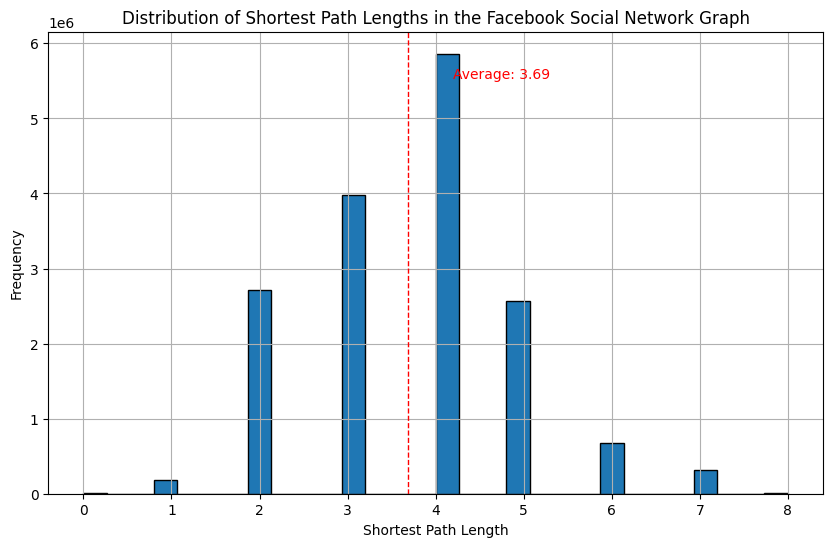

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file_path = '/content/facebook_combined (1).txt.gz'
df = pd.read_csv(file_path, compression='gzip', sep=' ', header=None, names=['Node1', 'Node2'])

# Create the graph
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2')

# Calculate all-pairs shortest path lengths
lengths = dict(nx.all_pairs_shortest_path_length(G))

# Flatten the lengths to get a list of distances
distances = [length for lengths_dict in lengths.values() for length in lengths_dict.values()]

# Calculate the average distance
average_distance = np.mean(distances)

# Plot the distribution of distances
plt.figure(figsize=(10, 6))
plt.hist(distances, bins=30, edgecolor='black')
plt.title('Distribution of Shortest Path Lengths in the Facebook Social Network Graph')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.axvline(average_distance, color='red', linestyle='dashed', linewidth=1)
plt.text(average_distance + 0.5, max(plt.ylim()) * 0.9, f'Average: {average_distance:.2f}', color='red')
plt.grid(True)

# Save the plot to a file
plot_path = 'shortest_path_lengths_distribution.png'
plt.savefig(plot_path)
plt.show()


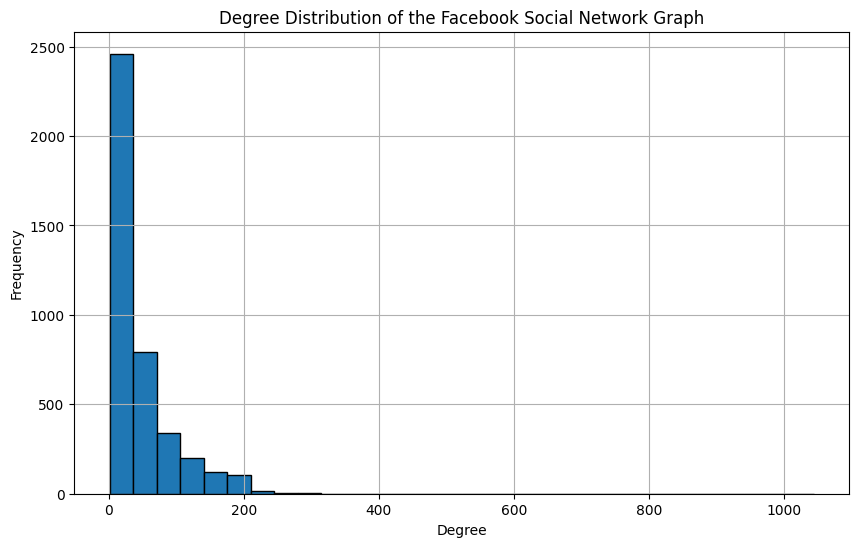

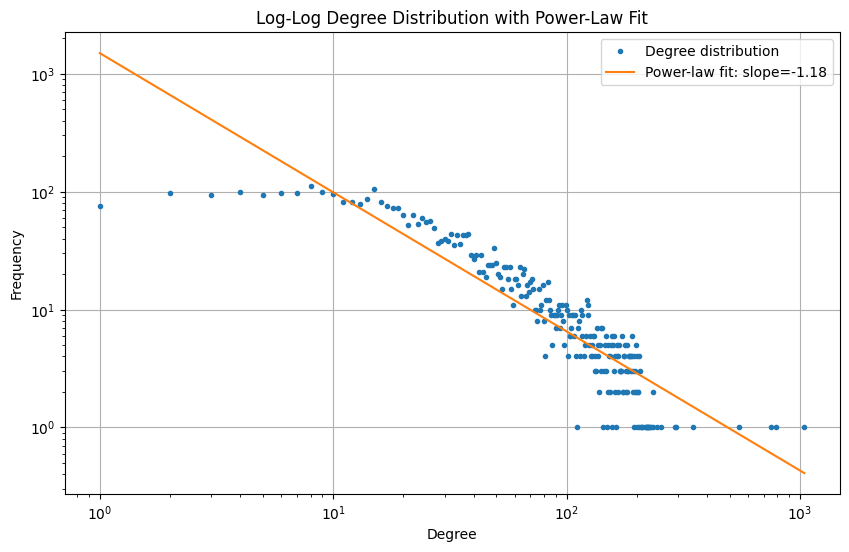

{'Average degree': 43.69101262688784, 'Variance of degree': 2747.2395107101647, 'Standard deviation of degree': 52.41411556737521, 'Power-law slope': -1.1801644192508838, 'R-squared of fit': 0.8091782885710812}


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


# Create the graph
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2')

# Calculate degrees
degrees = [degree for node, degree in G.degree()]
average_degree = np.mean(degrees)
variance_degree = np.var(degrees)
std_dev_degree = np.std(degrees)

# Plot the degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=30, edgecolor='black')
plt.title('Degree Distribution of the Facebook Social Network Graph')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)

# Fit a power-law distribution
degree_counts = np.bincount(degrees)
degree_values = np.arange(len(degree_counts))
nonzero_indices = degree_counts > 0
degree_values = degree_values[nonzero_indices]
degree_counts = degree_counts[nonzero_indices]

# Fit the power law
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(degree_values), np.log(degree_counts))

# Plot the power-law fit
plt.figure(figsize=(10, 6))
plt.loglog(degree_values, degree_counts, marker='.', linestyle='none', label='Degree distribution')
plt.loglog(degree_values, np.exp(intercept + slope * np.log(degree_values)), linestyle='-', label=f'Power-law fit: slope={slope:.2f}')
plt.title('Log-Log Degree Distribution with Power-Law Fit')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.show()

# Display results
results = {
    'Average degree': average_degree,
    'Variance of degree': variance_degree,
    'Standard deviation of degree': std_dev_degree,
    'Power-law slope': slope,
    'R-squared of fit': r_value**2,
}

print(results)


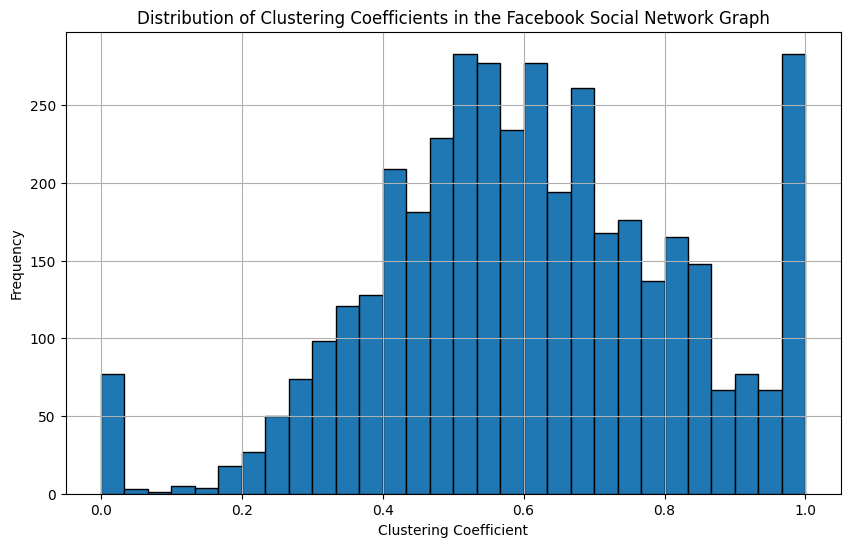

{'Average clustering coefficient': 0.6055467186200862}


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


# Create the graph
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2')

# Calculate the clustering coefficient for each node
clustering_coeffs = nx.clustering(G).values()

# Calculate the average clustering coefficient
average_clustering_coeff = np.mean(list(clustering_coeffs))

# Plot the distribution of the clustering coefficients
plt.figure(figsize=(10, 6))
plt.hist(list(clustering_coeffs), bins=30, edgecolor='black')
plt.title('Distribution of Clustering Coefficients in the Facebook Social Network Graph')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Display results
results = {
    'Average clustering coefficient': average_clustering_coeff
}

print(results)


In [ ]:

# Create the graph
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2')

# Calculate the size of the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
largest_cc_size = len(largest_cc)

# Display the size of the largest connected component
print(f'The size of the largest connected component is: {largest_cc_size}')


The size of the largest connected component is: 4039


In [ ]:

# Create the graph
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2')

# Calculate the assortativity coefficient
assortativity_coeff = nx.degree_assortativity_coefficient(G)

# Determine the degree correlation
if assortativity_coeff > 0:
    degree_correlation = 'assortative'
elif assortativity_coeff < 0:
    degree_correlation = 'disassortative'
else:
    degree_correlation = 'neutral'

# Display the results
results = {
    'Assortativity coefficient': assortativity_coeff,
    'Degree correlation': degree_correlation
}

print(results)


{'Assortativity coefficient': 0.06357722918564943, 'Degree correlation': 'assortative'}


{'Number of communities': 44, 'Community sizes': [198, 36, 10, 8, 8, 34, 2, 215, 16, 3, 3, 1030, 6, 7, 3, 3, 753, 10, 2, 2, 469, 13, 9, 3, 49, 25, 2, 60, 547, 179, 10, 9, 8, 226, 19, 4, 3, 8, 6, 14, 12, 7, 6, 2]}


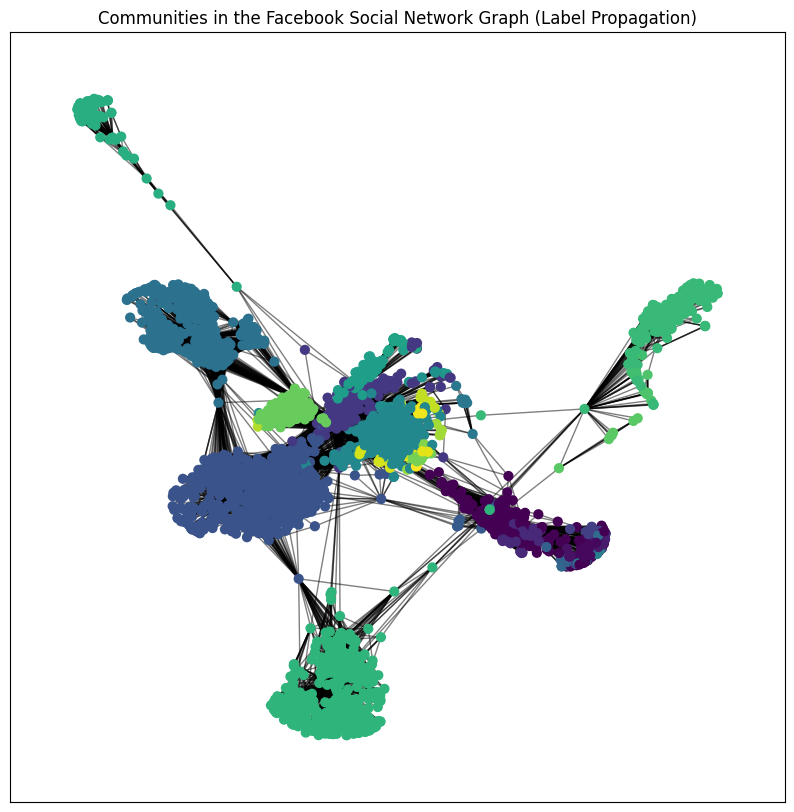

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Create the graph
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2')

# Detect communities using the Label Propagation algorithm
communities = nx.community.label_propagation_communities(G)

# Convert the communities to a list of sets
communities = list(communities)

# Number of communities
num_communities = len(communities)

# Size of each community
community_sizes = [len(c) for c in communities]

# Display the results
results = {
    'Number of communities': num_communities,
    'Community sizes': community_sizes
}

print(results)

# Assign a community to each node
community_dict = {}
for i, community in enumerate(communities):
    for node in community:
        community_dict[node] = i

# Plot the communities
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G)
cmap = plt.get_cmap('viridis', num_communities)
nx.draw_networkx_nodes(G, pos, node_size=40, cmap=cmap, node_color=[community_dict[node] for node in G.nodes()])
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Communities in the Facebook Social Network Graph (Label Propagation)')
plt.show()


Top 10 Degree Centrality:
Node 107: 0.2588
Node 1684: 0.1961
Node 1912: 0.1870
Node 3437: 0.1355
Node 0: 0.0859
Node 2543: 0.0728
Node 2347: 0.0721
Node 1888: 0.0629
Node 1800: 0.0607
Node 1663: 0.0582


Top 10 Betweenness Centrality:
Node 107: 0.4805
Node 1684: 0.3378
Node 3437: 0.2361
Node 1912: 0.2293
Node 1085: 0.1490
Node 0: 0.1463
Node 698: 0.1153
Node 567: 0.0963
Node 58: 0.0844
Node 428: 0.0643


Top 10 Closeness Centrality:
Node 107: 0.4597
Node 58: 0.3974
Node 428: 0.3948
Node 563: 0.3939
Node 1684: 0.3936
Node 171: 0.3705
Node 348: 0.3699
Node 483: 0.3698
Node 414: 0.3695
Node 376: 0.3666


Top 10 Eigenvector Centrality:
Node 1912: 0.0954
Node 2266: 0.0870
Node 2206: 0.0861
Node 2233: 0.0852
Node 2464: 0.0843
Node 2142: 0.0842
Node 2218: 0.0842
Node 2078: 0.0841
Node 2123: 0.0837
Node 1993: 0.0835




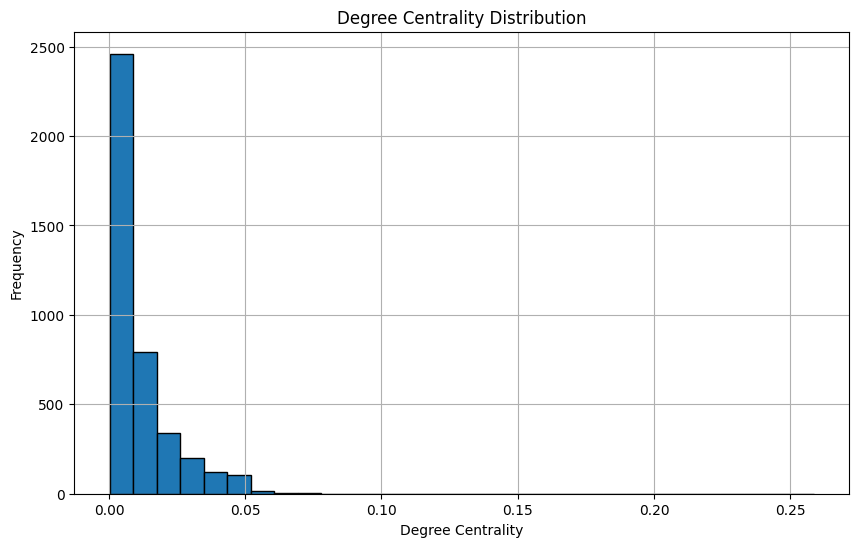

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Create the graph
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2')

# Calculate centralities
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)

# Get the top 10 nodes for each centrality measure
top_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_closeness = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]
top_eigenvector = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Display the results
results = {
    'Top 10 Degree Centrality': top_degree,
    'Top 10 Betweenness Centrality': top_betweenness,
    'Top 10 Closeness Centrality': top_closeness,
    'Top 10 Eigenvector Centrality': top_eigenvector
}

for centrality, top_nodes in results.items():
    print(f"{centrality}:")
    for node, value in top_nodes:
        print(f"Node {node}: {value:.4f}")
    print("\n")

# Plot degree centrality distribution
plt.figure(figsize=(10, 6))
plt.hist(list(degree_centrality.values()), bins=30, edgecolor='black')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [ ]:
# Create the graph
G = nx.from_pandas_edgelist(df, 'Node1', 'Node2')

# Calculate the assortativity coefficient for degree
degree_assortativity = nx.degree_assortativity_coefficient(G)

# Display the result
print(f"Degree Assortativity Coefficient: {degree_assortativity:.4f}")

# Interpret the result
if degree_assortativity > 0:
    interpretation = "The network is assortative, indicating that nodes tend to connect with other nodes of similar degree."
elif degree_assortativity < 0:
    interpretation = "The network is disassortative, indicating that nodes tend to connect with other nodes of different degree."
else:
    interpretation = "The network shows no assortative mixing by degree."

print(interpretation)

Degree Assortativity Coefficient: 0.0636
The network is assortative, indicating that nodes tend to connect with other nodes of similar degree.
